# Determine the appropriate cluster number

## Getting labels

In [1]:
from matplotlib import pyplot as plt
import commonmethods.image_modification as im
import commonmethods.optimal_cluster_number as ocn

image = im.load_image_grayscale('5')

pixel_values = image.reshape((-1, 1))

_,labels,_ = im.kmeans_segmentation(pixel_values, 2)

print('Calculation done!')

Calculation done!


## Calculate Silhouette score

In [ ]:
# the best is the closest to 1
from sklearn.metrics import silhouette_score
import time

start = time.time()
s_score = silhouette_score(pixel_values, labels)
end = time.time()

time = end-start
print('Silhouette Score: %.3f' % s_score)
print('Runtime of the Silhouette method: %.3f s' % time)

## Calculate Davies-Bouldin score

In [2]:
# the best is the least
from sklearn.metrics import davies_bouldin_score
import time

start = time.time()
db_score = davies_bouldin_score(pixel_values, labels)
end = time.time()

time = end-start
print('Davies-Bouldin Score: %.3f' % db_score)
print('Runtime of the Davies-Bouldin method: %.3f s' % time)

Davies-Bouldin Score: 0.263
Runtime of the Davies-Bouldin method: 0.940 s


## Calculate Calinski-Harabasz score

In [3]:
# the best is the biggest
from sklearn.metrics import calinski_harabasz_score
import time

start = time.time()
ch_score = calinski_harabasz_score(pixel_values, labels)
end = time.time()

time = end-start
print('Calinski-Harabasz Score: %.3f' % ch_score)
print('Runtime of the Calinski-Harabasz method: %.3f s' % time)

Calinski-Harabasz Score: 135945569.315
Runtime of the Calinski-Harabasz method: 0.787 s


## Elbow method

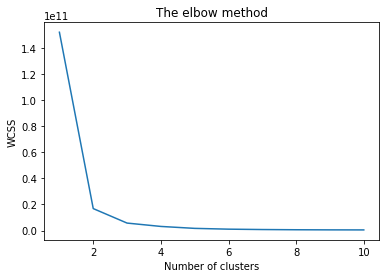

In [4]:
wcss = []   #within cluster sum of squares

for k in range(1, 11):
    compactness,_,_ = im.kmeans_segmentation(pixel_values, k)
    wcss.append(compactness)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()